**Import all required packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Load the data set**
**and find information about it**

In [7]:
df = pd.read_csv("S:\\LPIII\\User_price_predition\\dataset\\uber.csv")

**View the data set**

In [6]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [7]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


**In this data set the key id and index are not import columns so are going to drop them**

In [8]:
df = df.drop(['Unnamed: 0','key'],axis=1)

lets check it out

In [9]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


We find null values and if less in number then simply drop them

In [13]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [14]:
df.dropna(axis=0,inplace=True)

**Haversine Formula**

Calculatin the distance between the pickup and drop co-ordinates using the Haversine formual for accuracy.

In [16]:
#create the function

def dist(lon1,lon2,lat1,lat2): #pickup and drop latitude and longitude
    #these values are in degree so convert into meter
    lon1,lon2,lat1,lat2 = map(np.radians,[lon1,lon2,lat1,lat2]) #degree to radians

    lon_dif = lon2 -lon1
    lat_dif = lat2 - lat1
    #Haversine formula

    dist_km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(lat_dif/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(lon_dif/2.0)**2))

    return dist_km

In [17]:
# pass the values

distance_km = dist(df['pickup_longitude'],df['dropoff_longitude'],df['pickup_latitude'],df['dropoff_latitude'])

In [19]:
df['distance_km'] = distance_km

In [20]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


lets see the realation between fare and distance
using scatter plot

Text(0, 0.5, 'Fare Amount ($)')

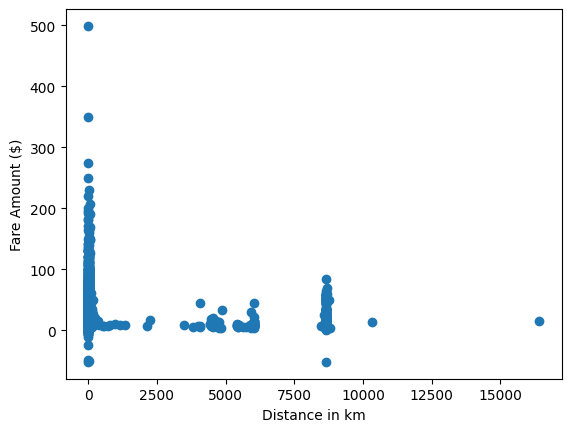

In [22]:
plt.scatter(df['distance_km'],df['fare_amount'])
plt.xlabel('Distance in km')
plt.ylabel('Fare Amount ($)')

date and time create seperate columns for usability

In [28]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])



In [29]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,Year,Month,Day,Day of Week,Day of Week_num,Hour,counter
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,2015,5,7,Thu,3,19,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,2009,7,17,Fri,4,20,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2009,8,24,Mon,0,21,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,2009,6,26,Fri,4,8,1
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,2014,8,28,Thu,3,17,1


Data Visualization Finding trends in data variables

*Average trip by year*

In [31]:
years = df['Year'].unique()

In [36]:
print(sorted(years))

[2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [60]:
df.drop(df[(df['fare_amount']>100) & (df['distance_km']<1)].index, inplace = True )
df.drop(df[(df['fare_amount']<100) & (df['distance_km']>100)].index, inplace = True )

Average trips a year: 
[2009, 2010, 2011, 2012, 2013, 2014, 2015] [30515, 30171, 31845, 32284, 31127, 29843, 13706]


<BarContainer object of 7 artists>

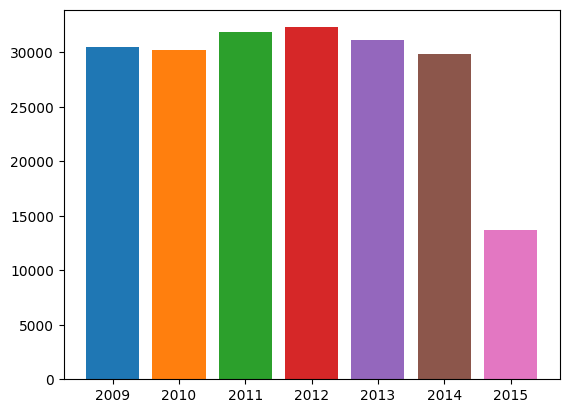

In [61]:
no_of_trips = []
year = [2009, 2010, 2011, 2012, 2013, 2014, 2015]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i in range(2009, 2016):
    x = df.loc[df['Year'] == i, 'counter'].sum()
    no_of_trips.append(x)

print("Average trips a year: ")
print(year, no_of_trips)

plt.bar(year, no_of_trips, color=colors)

**Avaragly trip by month**

Average trips a Month: 
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] [17629, 16639, 18712, 18559, 18815, 17731, 15062, 14183, 15230, 16171, 15276, 15484]


<BarContainer object of 12 artists>

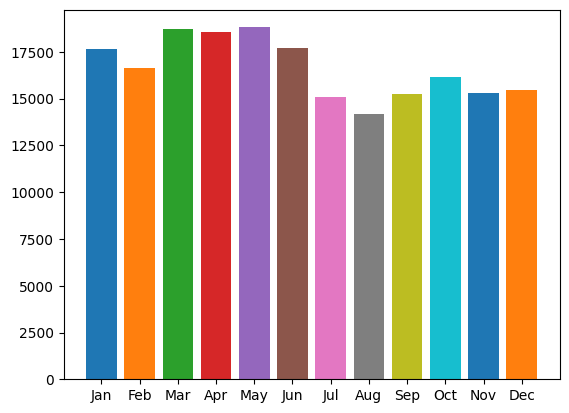

In [62]:
no_of_trips = []
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i in range(1, 13):
    x = df.loc[df['Month'] == i, 'counter'].sum()
    no_of_trips.append(x)

print("Average trips a Month: ")
print(month, no_of_trips)

plt.bar(month, no_of_trips, color=colors)

**Daily trips**

Average trips by Days: 
['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] [25174, 28049, 28962, 29946, 30805, 30173, 26382]


<BarContainer object of 7 artists>

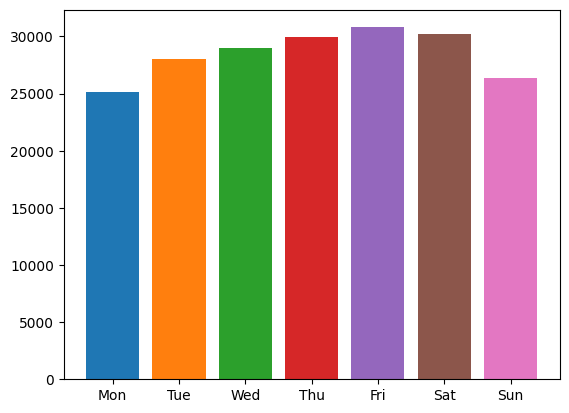

In [63]:
no_of_trips = []
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i in range(0, 7):
    x = df.loc[df['Day of Week_num'] == i, 'counter'].sum()
    no_of_trips.append(x)

print("Average trips by Days: ")
print(day, no_of_trips)

plt.bar(day, no_of_trips, color=colors)

C:\Users\gaura\AppData\Local\Temp\ipykernel_20248\2322029294.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare_amount'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)


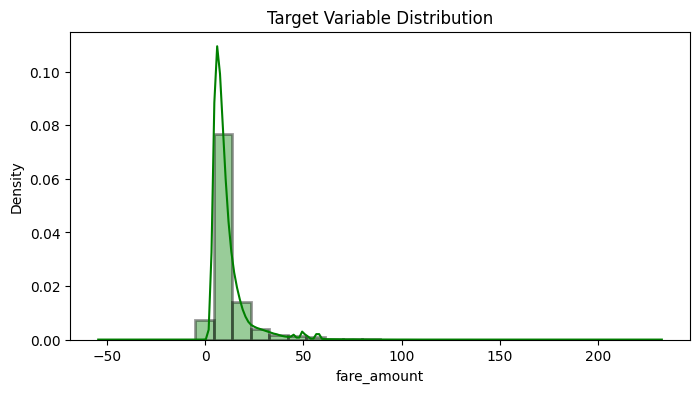

In [64]:
import seaborn as sns
plt.figure(figsize=[8,4])
sns.distplot(df['fare_amount'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.show()

**Statistics**

statistical information about the data


In [65]:
df.drop(df[(df['fare_amount']>100) & (df['distance_km']<1)].index, inplace = True )
df.drop(df[(df['fare_amount']<100) & (df['distance_km']>100)].index, inplace = True )

In [66]:
import statistics as st

print("Mean of fare prices is % s "
         % (st.mean(df['fare_amount'])))

print("Median of fare prices is % s "
         % (st.median(df['fare_amount'])))

print("Standard Deviation of Fare Prices is % s "
                % (st.stdev(df['fare_amount'])))

Mean of fare prices is 11.324769087327248 
Median of fare prices is 8.5 
Standard Deviation of Fare Prices is 9.627356453747998 


**Distant**

In [67]:
import statistics as st
print("Mean of distance_km is % s "
         % (st.mean(df['distance_km'])))

print("Median of distance_km is % s "
         % (st.median(df['distance_km'])))

print("Standard Deviation of distance_km is % s "
                % (st.stdev(df['distance_km'])))

Mean of distance_km is 3.267300488082685 
Median of distance_km is 2.1161586956761145 
Standard Deviation of distance_km is 3.717933180174616 


Coorelation Matrix
To find the two variables that have the most inter-dependence

In [69]:
df['Day of Week'] = pd.to_numeric(df['Day of Week'], errors='coerce')

In [70]:
corr = df.corr()

corr.style.background_gradient(cmap='BuGn')

C:\Users\gaura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\io\formats\style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\gaura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\io\formats\style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,Year,Month,Day,Day of Week,Day of Week_num,Hour,counter
fare_amount,1.000000,0.125366,0.005832,-0.006195,0.005448,-0.006083,0.011361,0.830414,0.120881,0.024043,0.001100,nan,0.006544,-0.020587,nan
pickup_datetime,0.125366,1.000000,0.005650,-0.008054,0.005623,-0.008132,0.006473,0.026186,0.987982,0.038472,-0.002038,nan,0.004738,0.002027,nan
pickup_longitude,0.005832,0.005650,1.000000,-0.973209,0.999992,-0.981944,-0.000561,-0.113318,0.005973,-0.002700,0.005291,nan,0.003024,0.001508,nan
pickup_latitude,-0.006195,-0.008054,-0.973209,1.000000,-0.973211,0.991078,-0.001274,0.107577,-0.008541,0.004129,-0.008889,nan,-0.004801,-0.001787,nan
dropoff_longitude,0.005448,0.005623,0.999992,-0.973211,1.000000,-0.981945,-0.000563,-0.113572,0.005946,-0.002691,0.005298,nan,0.003099,0.001278,nan
dropoff_latitude,-0.006083,-0.008132,-0.981944,0.991078,-0.981945,1.000000,-0.001119,0.106248,-0.008625,0.004174,-0.008890,nan,-0.004666,-0.001422,nan
passenger_count,0.011361,0.006473,-0.000561,-0.001274,-0.000563,-0.001119,1.000000,0.006691,0.004861,0.009881,0.003137,nan,0.033391,0.013199,nan
distance_km,0.830414,0.026186,-0.113318,0.107577,-0.113572,0.106248,0.006691,1.000000,0.024287,0.011351,0.000568,nan,0.016425,-0.030268,nan
Year,0.120881,0.987982,0.005973,-0.008541,0.005946,-0.008625,0.004861,0.024287,1.000000,-0.115909,-0.012141,nan,0.006018,0.002168,nan
Month,0.024043,0.038472,-0.002700,0.004129,-0.002691,0.004174,0.009881,0.011351,-0.115909,1.000000,-0.017323,nan,-0.008790,-0.003995,nan


**Standardization**
For more accurate results on our linear regression model

Assigning the dependent and independent variable

In [71]:
X = df['distance_km'].values.reshape(-1, 1)        #Independent Variable
y = df['fare_amount'].values.reshape(-1, 1)     #Dependent Variable

In [72]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
y_std = std.fit_transform(y)
print(y_std)

x_std = std.fit_transform(X)
print(x_std)

[[-0.39728234]
 [-0.37650815]
 [ 0.16362071]
 ...
 [ 2.03329752]
 [ 0.3298142 ]
 [ 0.28826583]]
[[-0.42603824]
 [-0.21778569]
 [ 0.47582381]
 ...
 [ 2.57751879]
 [ 0.07327072]
 [ 0.57840964]]


In [73]:
#Splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.2, random_state=0)

**Simple Linear Regression**

In [74]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

print("Training set score: {:.2f}".format(l_reg.score(X_train, y_train)))
print("Test set score: {:.7f}".format(l_reg.score(X_test, y_test)))

Training set score: 0.69
Test set score: 0.6883117


In [81]:
# Flatten nested lists or multi-dimensional arrays
y_test = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()

In [83]:
#Actual vs Predicted Values

y_pred = l_reg.predict(X_test)
y_test = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()
df_1 = {'Actual': y_test, 'Predicted': y_pred}
df_2 = pd.DataFrame(df_1)

In [84]:
df_2.head()

,Actual,Predicted
0,-0.085670,0.038672
1,0.122072,0.274752
2,0.225943,0.242573
3,0.122072,0.087918
4,-0.501153,-0.388759


**Accuracy Checking**
Finding the MSE,MAE, RMSE, etc.

In [85]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Absolute % Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.27460322438299567
Mean Squared Error: 0.3117811530797184
Root Mean Squared Error: 0.5583736679677135


In [86]:
print(l_reg.intercept_)
print(l_reg.coef_)

[-0.00037819]
[[0.83087802]]


**Plotting the Graph**

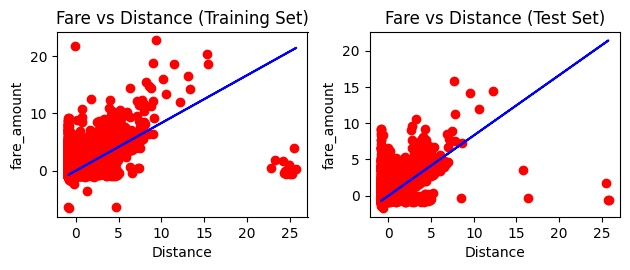

In [87]:
plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.title("Fare vs Distance (Training Set)")
plt.ylabel("fare_amount")
plt.xlabel("Distance")

plt.subplot(2, 2, 2)
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, l_reg.predict(X_train), color ="blue")
plt.ylabel("fare_amount")
plt.xlabel("Distance")
plt.title("Fare vs Distance (Test Set)")


plt.tight_layout()
plt.rcParams["figure.figsize"] = (32,22)
plt.show()

In [90]:
prediction = l_reg.predict(X_train[10].reshape(1, -1))
prediction

array([[0.19867003]])

In [93]:
from sklearn.metrics import r2_score

# Assuming y_test and y_pred are your actual and predicted values, respectively
r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.6883117214852594
